In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from collections import defaultdict

In [186]:
csv_path = Path('results//')
sgd = defaultdict(list)
class_mates = ['Abhi', 'arda', 'jatin']
class_mates_sgd = defaultdict(list)
for csv in sorted(list(csv_path.glob('*.csv'))):
    pps, track = csv.stem.split('_')[:2]
    df = pd.read_csv(csv, skiprows=5,names=['Test file','Session 1', 'Average'])
    for index, row in df.iterrows():
#         sgd[row['Test file']].append(row['Average'])
        if pps in class_mates:
            class_mates_sgd[row['Test file'].strip()].append(row['Average'])
#     if pps == 'jatin':
#         class_mates_sgd[row['Test file']].append(row['Average'])            

In [187]:
class_mates_sgd

defaultdict(list,
            {'castanet_vq_128.wav': [-0.1, -0.9, -2.0],
             'castanet_full_128.wav': [0.0, -0.5, -1.0],
             'castanet_base_128.wav': [-1.0, -0.8, -1.5],
             'castanet_bs_96.wav': [-3.0, -2.0, -3.0],
             'castanet_vq_96.wav': [-2.5, -2.0, -2.0],
             'castanet_base_96.wav': [-2.0, -1.1, -2.5],
             'castanet_full_96.wav': [-1.0, -0.8, -1.0],
             'castanet_full+SBR_96.wav': [-0.5, -0.5, -2.0],
             'castanet_bs_128.wav': [-2.0, -0.4, -1.5],
             'glockenspiel_full+SBR_96.wav': [-0.4, -1.1, -2.0],
             'glockenspiel_full_96.wav': [-1.0, -1.5, -2.0],
             'glockenspiel_base_128.wav': [-1.0, -0.7, -1.5],
             'glockenspiel_full_128.wav': [-0.9, -1.2, -1.0],
             'glockenspiel_bs_96.wav': [0.0, -0.4, -1.5],
             'glockenspiel_vq_96.wav': [-1.5, -1.5, -1.5],
             'glockenspiel_bs_128.wav': [0.0, -0.3, -1.0],
             'glockenspiel_vq_128.wav': [-1.

In [188]:
df = pd.DataFrame(class_mates_sgd)
df

,castanet_vq_128.wav,castanet_full_128.wav,castanet_base_128.wav,castanet_bs_96.wav,castanet_vq_96.wav,castanet_base_96.wav,castanet_full_96.wav,castanet_full+SBR_96.wav,castanet_bs_128.wav,glockenspiel_full+SBR_96.wav,...,quar48_1_full+SBR_96.wav,spmg_full_96.wav,spmg_vq_128.wav,spmg_bs_96.wav,spmg_bs_128.wav,spmg_full+SBR_96.wav,spmg_vq_96.wav,spmg_base_128.wav,spmg_full_128.wav,spmg_base_96.wav
0,-0.1,0.0,-1.0,-3.0,-2.5,-2.0,-1.0,-0.5,-2.0,-0.4,...,-2.5,-2.0,-0.1,-2.5,0.0,-1.4,-2.5,-0.2,0.0,-2.0
1,-0.9,-0.5,-0.8,-2.0,-2.0,-1.1,-0.8,-0.5,-0.4,-1.1,...,-1.0,-0.8,-0.8,-1.1,-0.3,-1.0,-1.0,-0.4,-0.5,-1.0
2,-2.0,-1.0,-1.5,-3.0,-2.0,-2.5,-1.0,-2.0,-1.5,-2.0,...,-3.0,-2.0,-0.5,-2.5,-1.0,-2.0,-1.5,-0.5,-0.5,-2.0


In [189]:
df_sorted = df.sort_values(by=0, axis=1, ascending=False)

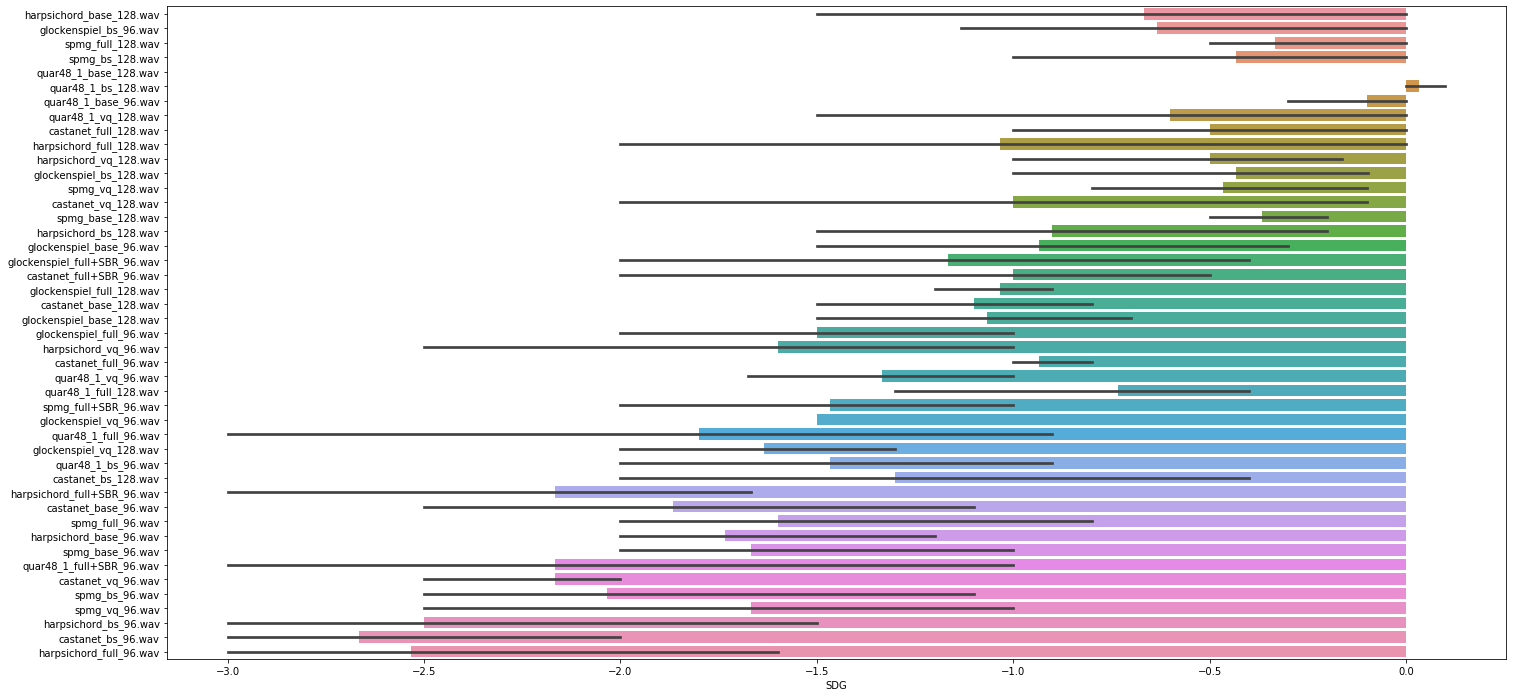

In [190]:
plt.figure(figsize=(24,12));
sns.barplot(data=df_sorted, orient='h');
plt.xlabel('SDG')
plt.savefig('all_codecs_sdg.png', dpi=230)

vq128
full128
base128
bs96
vq96
base96
full96
full+SBR96
bs128
full+SBR96
full96
base128
full128
bs96
vq96
bs128
vq128
base96
vq128
full128
base96
vq96
base128
bs128
full96
full+SBR96
bs96
vq96
vq128
full96
bs96
base96
bs128
full128
base128
full+SBR96
full96
vq128
bs96
bs128
full+SBR96
vq96
base128
full128
base96
defaultdict(<class 'list'>, {'vq128': [-0.1, -1.6, 0.0, 0.0, -0.1], 'full128': [0.0, -0.9, 0.0, -1.3, 0.0], 'base128': [-1.0, -1.0, 0.0, 0.0, -0.2], 'bs96': [-3.0, 0.0, -3.0, -2.0, -2.5], 'vq96': [-2.5, -1.5, -1.0, -1.0, -2.5], 'base96': [-2.0, -0.3, -2.0, 0.0, -2.0], 'full96': [-1.0, -1.0, -3.0, -1.5, -2.0], 'full+SBR96': [-0.5, -0.4, -2.0, -2.5, -1.4], 'bs128': [-2.0, 0.0, -0.2, 0.0, 0.0]})


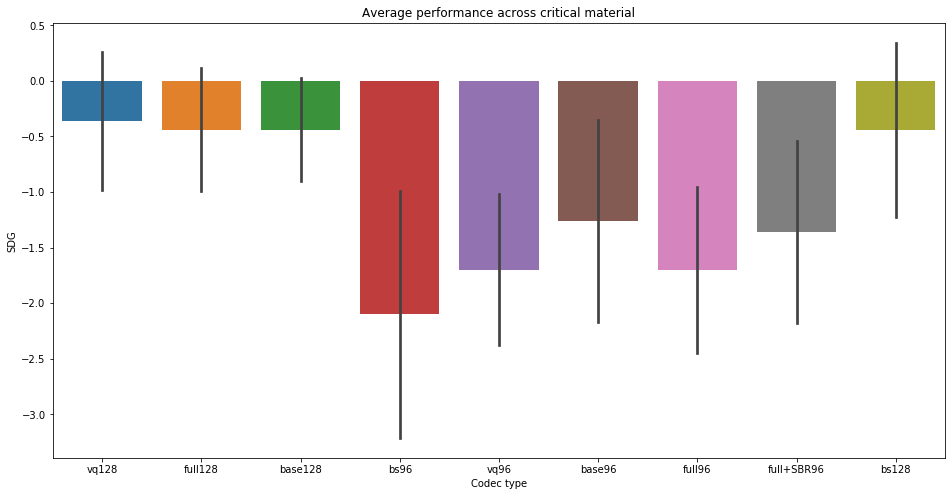

In [113]:
# Analyze average per method
plt.figure(figsize=(16, 8))
avg_perf = defaultdict(list)
for col in df:
    qtype = ''.join(Path(col).stem.split('_')[-2:])
    print(qtype)
    avg_perf[qtype].append(df[col][0])
print(avg_perf)
sns.barplot(data=pd.DataFrame(avg_perf), ci='sd');
plt.ylabel('SDG')
plt.xlabel('Codec type')
plt.title('Average performance across critical material')
plt.savefig('avg_codec_performance_classmates.png', dpi=250)

In [191]:
select = ['full_128', 'base_128']
chosen_cols = []
for col in df.columns:
    for s in select:
        if s in col:
            chosen_cols.append(col)
df[chosen_cols]

,castanet_full_128.wav,castanet_base_128.wav,glockenspiel_base_128.wav,glockenspiel_full_128.wav,harpsichord_full_128.wav,harpsichord_base_128.wav,quar48_1_full_128.wav,quar48_1_base_128.wav,spmg_base_128.wav,spmg_full_128.wav
0,0.0,-1.0,-1.0,-0.9,0.0,0.0,-1.3,0.0,-0.2,0.0
1,-0.5,-0.8,-0.7,-1.2,-1.1,-0.5,-0.4,0.0,-0.4,-0.5
2,-1.0,-1.5,-1.5,-1.0,-2.0,-1.5,-0.5,0.0,-0.5,-0.5


In [195]:
df = df[chosen_cols]
df = df.reindex(sorted(df.columns), axis=1)
df

,castanet_base_128.wav,castanet_full_128.wav,glockenspiel_base_128.wav,glockenspiel_full_128.wav,harpsichord_base_128.wav,harpsichord_full_128.wav,quar48_1_base_128.wav,quar48_1_full_128.wav,spmg_base_128.wav,spmg_full_128.wav
0,-1.0,0.0,-1.0,-0.9,0.0,0.0,0.0,-1.3,-0.2,0.0
1,-0.8,-0.5,-0.7,-1.2,-0.5,-1.1,0.0,-0.4,-0.4,-0.5
2,-1.5,-1.0,-1.5,-1.0,-1.5,-2.0,0.0,-0.5,-0.5,-0.5


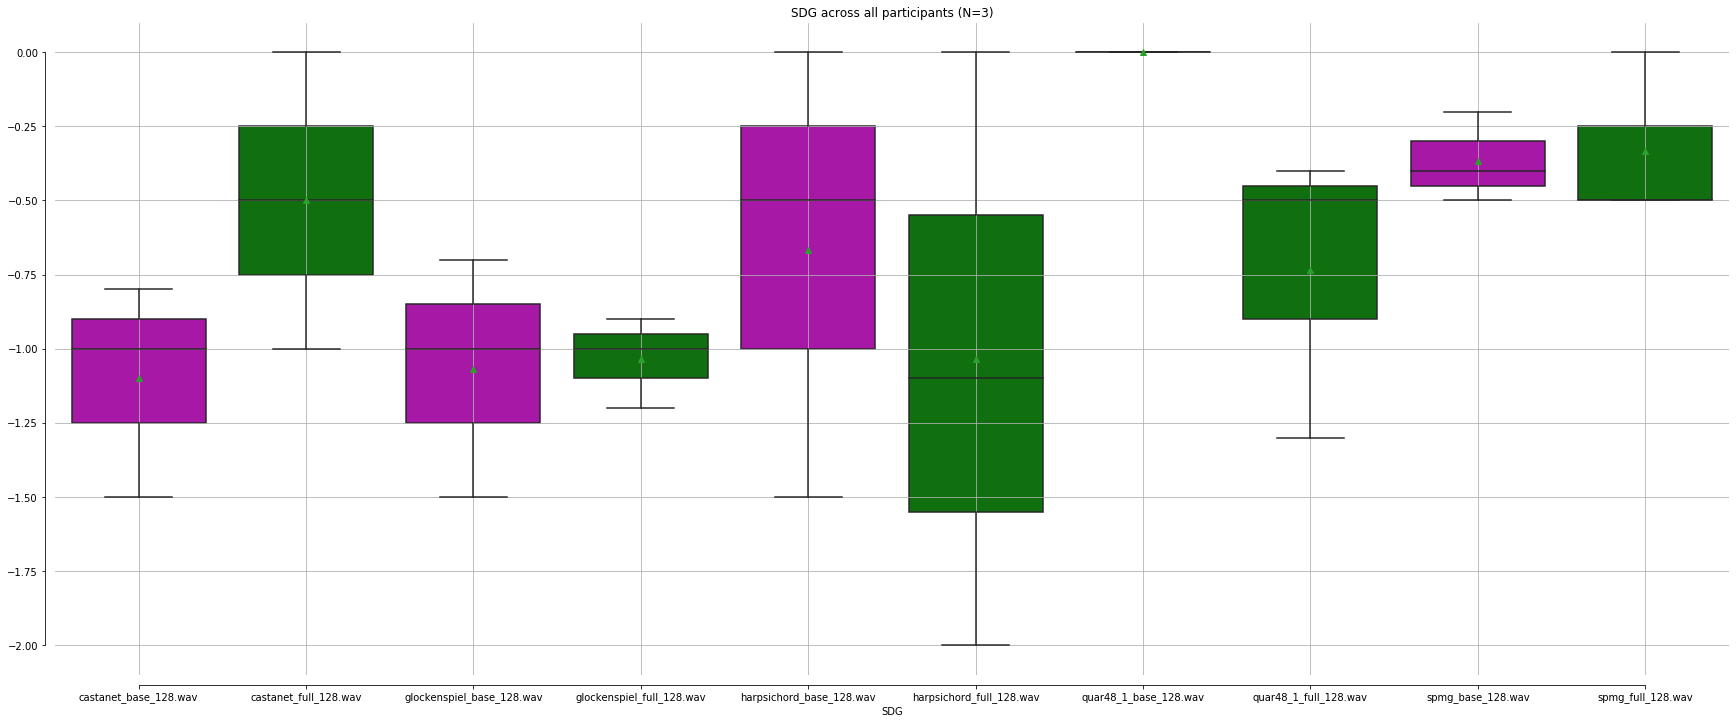

In [197]:
plt.figure(figsize=(30,12));
sns.boxplot(data=df, showmeans=True, orient='v', palette=["m", "g"]);
plt.grid();
plt.xlabel('SDG');
plt.title(f'SDG across all participants (N={len(df)})');
plt.savefig('sdg_analysis_128.png', dpi=250);
sns.despine(offset=10, trim=True)    